In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
seeds=pd.read_csv('Seed_Data.csv')
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
target_array = seeds['target'].values

# Menampilkan array
print(target_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
seed_dict={
    0:'Mawar',
    1:'Melati',
    2:'Kamboja'
}
seed_list=seeds['target'].map(seed_dict).tolist()

In [6]:
seeds=seeds.drop(['target'],axis=1)
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


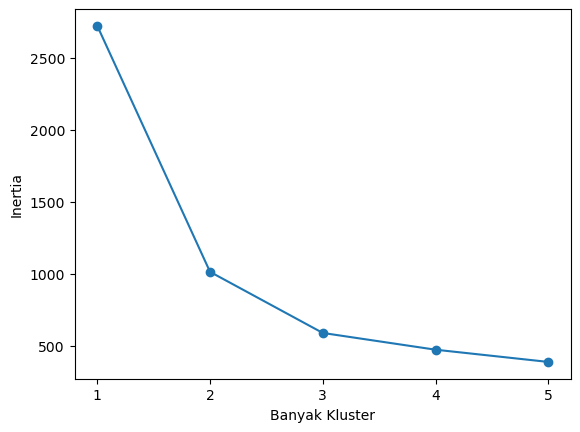

In [7]:
ks=range(1,6)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(seeds)
    inertias.append(model.inertia_)

plt.plot(ks,inertias,'-o')
plt.xlabel('Banyak Kluster')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [8]:
model=KMeans(n_clusters=3)
seed_labels=model.fit_predict(seeds)
centroids=model.cluster_centers_
centroids

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

### A vs LKG

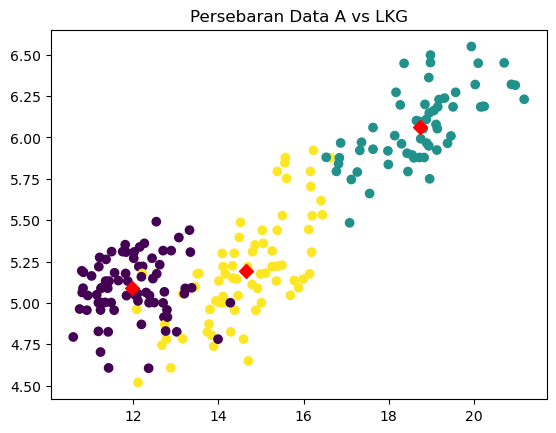

In [9]:
xs_A=seeds.iloc[:,0]
ys_LKG=seeds.iloc[:,-1]
centroids_xs_A=centroids[:,0]
centroids_ys_LKG=centroids[:,-1]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.title('Persebaran Data A vs LKG')
plt.show()

### WK vs A_Coeff

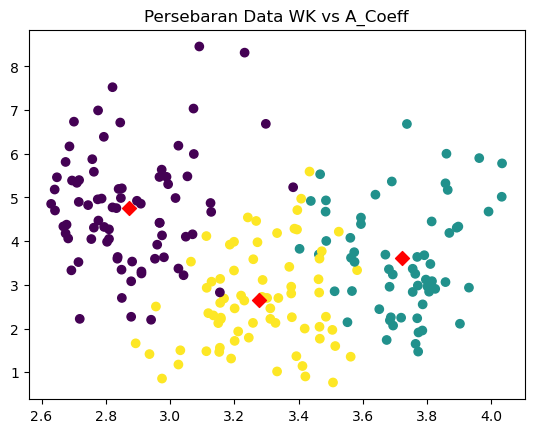

In [10]:
xs_A=seeds.iloc[:,4]
ys_LKG=seeds.iloc[:,5]
centroids_xs_A=centroids[:,4]
centroids_ys_LKG=centroids[:,5]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.title('Persebaran Data WK vs A_Coeff')
plt.show()

### P vs C

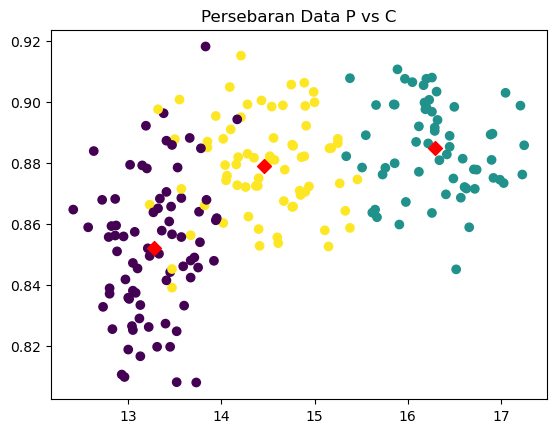

In [11]:
xs_A=seeds.iloc[:,1]
ys_LKG=seeds.iloc[:,2]
centroids_xs_A=centroids[:,1]
centroids_ys_LKG=centroids[:,2]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.title('Persebaran Data P vs C')
plt.show()